In [50]:
from pandas_datareader import data as pdr
import yfinance as yf
yf.pdr_override()
code='AAPL'  #The stock you wanna search for
stock = pdr.get_data_yahoo(code,'2020-01-01','2021-01-01')  #get data from initial to end.
print(stock)  #print the stocks out 
#save as excel & csv file
stock.to_excel('D:\\Groupproject\\Stockdatas\\'+code+'.xlsx')
stock.to_csv('D:\\Groupproject\\Stockdatas\\+'+code+'.csv')


[*********************100%***********************]  1 of 1 completed
                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2020-01-02   74.059998   75.150002   73.797501   75.087502   74.333511   
2020-01-03   74.287498   75.144997   74.125000   74.357498   73.610840   
2020-01-06   73.447502   74.989998   73.187500   74.949997   74.197395   
2020-01-07   74.959999   75.224998   74.370003   74.597504   73.848442   
2020-01-08   74.290001   76.110001   74.290001   75.797501   75.036385   
...                ...         ...         ...         ...         ...   
2020-12-24  131.320007  133.460007  131.100006  131.970001  131.773087   
2020-12-28  133.990005  137.339996  133.509995  136.690002  136.486053   
2020-12-29  138.050003  138.789993  134.339996  134.869995  134.668762   
2020-12-30  135.580002  135.990005  133.399994  133.720001  133.520477   
2020-12-31  134.080002  134.740005  131.720

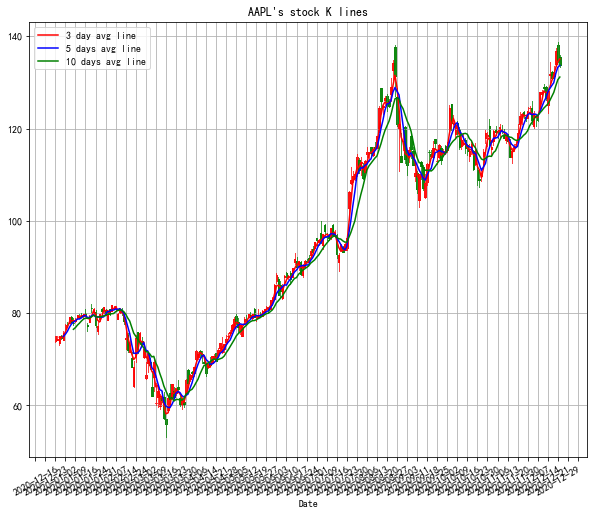

In [51]:
from pandas_datareader import data as pdr
import pandas as pd
import matplotlib.pyplot as plt
from mpl_finance import candlestick2_ochl
from matplotlib.ticker import MultipleLocator
import yfinance as yf
yf.pdr_override()
code='AAPL'  #the stock we searching for
stock.drop(stock.index[len(stock)-1],inplace=True)  #get all the informs from AAPL
stock.to_csv('D:\\Groupproject\\Stockdatas\\AAPL.csv')  #save the stock to our machine
df = pd.read_csv('D:/Groupproject/Stockdatas/AAPL.csv',encoding='gbk',index_col=0)  #read the file from the machine
fig, ax = plt.subplots(figsize=(10, 8))  #plt size
xmajorLocator   = MultipleLocator(5)
ax.xaxis.set_major_locator(xmajorLocator)
candlestick2_ochl(ax = ax, opens=df["Open"].values,closes=df["Close"].values, highs=df["High"].values, lows=df["Low"].values,width=0.75, colorup='red', colordown='green')
#drawing for 3 lines
df['Close'].rolling(window=3).mean().plot(color="red",label='3 day avg line')
df['Close'].rolling(window=5).mean().plot(color="blue",label='5 days avg line')
df['Close'].rolling(window=10).mean().plot(color="green",label='10 days avg line')
plt.legend(loc='best')     #draw the graph
ax.grid(True)     #grid line
plt.title("AAPL's stock K lines")
plt.rcParams['font.sans-serif']=['SimHei']
plt.setp(plt.gca().get_xticklabels(), rotation=30) 
plt.show()

In [52]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
# getting data from the machine
origDf = pd.read_csv('D:\\Groupproject\\Stockdatas\\AAPL.csv',encoding='gbk')
df = origDf[['Close', 'High', 'Low','Open' ,'Volume']]
featureData = df[['Open', 'High', 'Volume','Low']]
#specifics the values
feature = featureData.values
target = np.array(df['Close'])

In [53]:
feature_train, feature_test, target_train ,target_test = train_test_split(feature,target,test_size=0.05)
pridectedDays = int(math.ceil(0.05 * len(origDf)))     # predict days
lrTool = LinearRegression()
lrTool.fit(feature_train,target_train)
predictByTest = lrTool.predict(feature_test)  # Test

In [ ]:
index=0

while index < len(origDf) - pridectedDays:
    try:
        df.ix[index,'predictedVal']=origDf.ix[index,'Close']
        df.ix[index,'Date']=origDf.ix[index,'Date']
        index = index+1
        predictedCnt=0
    except AttributeError:
        print:('AttributeError')
# while predictedCnt<pridectedDays:
#     try:
#         df.ix[index,'predictedVal']=predictByTest[predictedCnt]
#         df.ix[index,'Date']=origDf.ix[index,'Date']
#         predictedCnt=predictedCnt+1
#         index=index+1
#     except AttributeError:
#         print('AttributeError')

In [ ]:
while predictedCnt<pridectedDays:
    try:
        df.ix[index,'predictedVal']=predictByTest[predictedCnt]
        df.ix[index,'Date']=origDf.ix[index,'Date']
        predictedCnt=predictedCnt+1
        index=index+1
    except AttributeError:
        print('AttributeError')

In [ ]:
plt.figure()
df['predictedVal'].plot(color="red",label='predicted Data')
df['Close'].plot(color="blue",label='Real Data')
plt.legend(loc='best')  #draw
major_index=df.index[df.index%10==0]  #set x title
major_xtics=df['Date'][df.index%10==0]  #set x titl
plt.xticks(major_index,major_xtics)
plt.setp(plt.gca().get_xticklabels(), rotation=30)
plt.grid(linestyle='-.')
plt.show()
